# Author: Vidit Jain

## Data Science and Business Analytics Intern
### GRIP @ The Sparks Foundation
## Task 1: Prediction using Supervised ML
* The goal is to Build a Supervised machine Learning Model to predict the Score (in percentage) of a student based on no. study hours/day.
* This is a simple Linear Regression Model which involves only 2 variables.

## Importing required Libraries

In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings 
warnings.filterwarnings(action= 'ignore')


## Loading Dataset

In [124]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [139]:
df.shape

(25, 2)

* Our dataset contains just 25 rows and 2 columns; it is very small dataset

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visulaizing Dataset (MultiVariate Analysis)

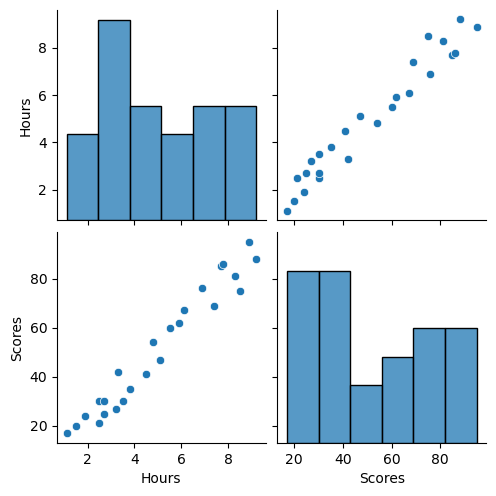

In [126]:
%matplotlib inline
sns.pairplot(df)
plt.show()

* Since, there is a Linear Relationship between dependent and independent variable , we can apply Linear Regression

### Checking for Missing Values

In [127]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

* we can proceed further as there is no missing values.

### Checking for outliers

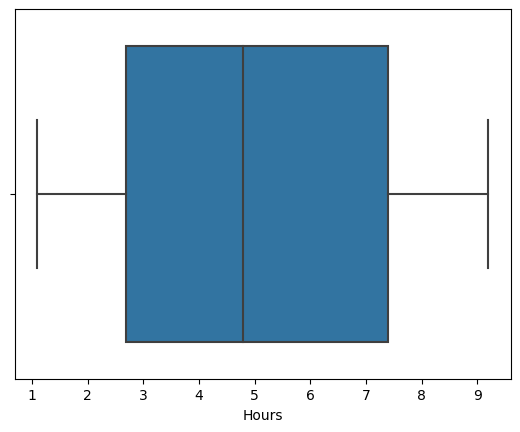

In [128]:
sns.boxplot(df.Hours)
plt.show()

* There are no Outliers.

## Data preprocessing

In [129]:
X = df.drop('Scores',axis=1)
Y = df['Scores']

In [130]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [131]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## Model Training

In [133]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
regressor.score(x_train,y_train)

0.9484509249326872

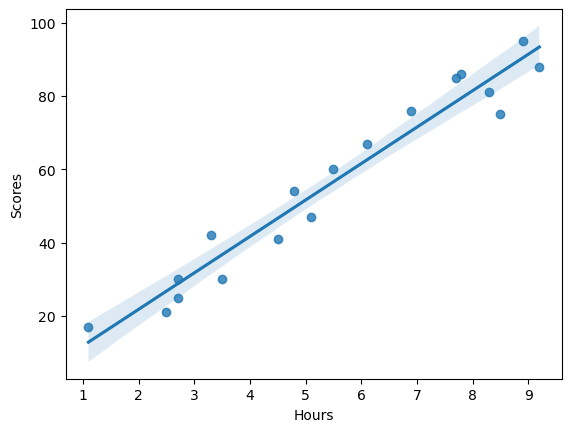

In [138]:
sns.regplot(x_train,y_train)
plt.show()

In [134]:
print('slope: {}'.format(regressor.coef_))
print('intercept: {}'.format(regressor.intercept_))

slope: [9.94167834]
intercept: 1.9322042531516601


## Model Evaluation

In [137]:
y_pred = regressor.predict(x_test)
scores = pd.DataFrame({'Actual_score':y_test , 'Predicted_Score':y_pred })
scores

,Actual_score,Predicted_Score
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [108]:
print('Test Score: {}'.format(regressor.score(x_test,y_test)))

Test Score: 0.9367661043365056


* we get a R2_score = 0.9368 for Test Dataset ; which is a pretty good score for a model

In [109]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE )

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


## Predciting Score on basis of no. of hours studied
* How much will be a student score after studying 9.25 hrs/day

In [110]:
hrs = 9.25
test = np.array([hrs])
test = test.reshape(-1,1)
pred = regressor.predict(test)
pred

array([93.89272889])

* student will score approximately 94 marks if he/she study 9.25 hrs/day